In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [4]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [5]:
import pandas as pd
from PIL import Image as ima

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# Add function def show_anns (borrowed from one of the Jupyter notebooks).
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    # polygons = []
    # color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    # for ann in sorted_anns:
    #     m = ann['segmentation']
    #     img = np.ones((m.shape[0], m.shape[1], 3))
    #     color_mask = np.random.random((1, 3)).tolist()[0]
    #     for i in range(3):
    #         img[:,:,i] = color_mask[i]
    #     ax.imshow(np.dstack((img, m*0.35)))

In [7]:
imageo = cv2.imread("/home/yelhe/data/fig/06.jpg")
imageo = cv2.cvtColor(imageo, cv2.COLOR_BGR2RGB)

In [8]:
b = np.load('/home/yelhe/script/mt/output/mask0.npy', allow_pickle=True)


In [9]:
mb = []
for i in range(0, len(b)):
    mb.append(b[i].astype('uint8'))

In [10]:
len(mb)

48

In [11]:
mb[2].dtype

dtype('uint8')

## Features summary

In [12]:
# Generate a data frame for masks and attributes
df = pd.DataFrame()
df['mask'] = range(1, (len(mb)+1))

In [13]:
df = df.assign(gmedian = None)
df = df.assign(rmedian = None)
df = df.assign(bmedian = None)
df = df.assign(bmean = None)
df = df.assign(gmean = None)
df = df.assign(rmean = None)
df = df.assign(bstd = None)
df = df.assign(gstd = None)
df = df.assign(rstd = None)

In [125]:
# Masked image 
maskedimg = []
for i in range(0, len(mb)):
    maskedimg.append(cv2.bitwise_and(imageo,imageo,mask = mb[i]))

### Spectual Features

In [15]:
mib = []
mig = []
mir = []
for i in range(0, len(maskedimg)):
    mib.append((maskedimg[i][:,:,0])[np.where((maskedimg[i][:,:,0]) != 0)])
    mig.append((maskedimg[i][:,:,1])[np.where((maskedimg[i][:,:,1]) != 0)])
    mir.append((maskedimg[i][:,:,2])[np.where((maskedimg[i][:,:,2]) != 0)])

In [16]:
for i in range(0, len(maskedimg)):
    df.at[i, 'bmean'] = np.mean(mib[i], axis = 0)
    df.at[i,'gmean'] = np.mean(mig[i], axis = 0)
    df.at[i,'rmean'] = np.mean(mir[i], axis = 0)
    df.at[i,'bmedian'] = np.median(mib[i], axis = 0)
    df.at[i,'gmedian'] = np.median(mig[i], axis = 0)
    df.at[i,'rmedian'] = np.median(mir[i], axis = 0)
    df.at[i,'bstd'] = np.std(mib[i], axis = 0)
    df.at[i,'gstd'] = np.std(mig[i], axis = 0)
    df.at[i,'rstd'] = np.std(mir[i], axis = 0)

In [17]:
df

,mask,gmedian,rmedian,bmedian,bmean,gmean,rmean,bstd,gstd,rstd
0,1,159.0,220.0,113.0,115.037443,161.245059,219.314712,29.17168,27.310695,19.057815
1,2,150.0,149.0,155.0,154.293353,147.912176,146.682473,18.354942,19.075097,20.102601
2,3,149.0,141.0,158.0,157.416081,147.710813,140.176188,11.144862,11.46543,11.599858
3,4,196.0,178.0,206.0,189.341364,179.771029,163.463858,41.91493,41.903284,39.716842
4,5,63.0,79.0,55.0,58.687735,66.94285,80.942669,20.713621,19.271871,17.466285
5,6,84.0,81.0,72.0,81.295082,93.836182,93.67527,33.403473,35.575548,37.280396
6,7,38.0,44.0,26.0,41.372655,53.490316,58.147206,36.689598,36.629197,36.59143
7,8,48.0,59.0,36.0,53.114203,70.331298,88.959082,45.544162,54.896313,67.209081
8,9,54.0,75.0,38.0,64.578249,80.163671,100.161126,57.268386,55.777601,56.266251
9,10,146.0,158.0,139.0,140.124865,147.572832,159.817085,41.795546,38.38698,33.499303


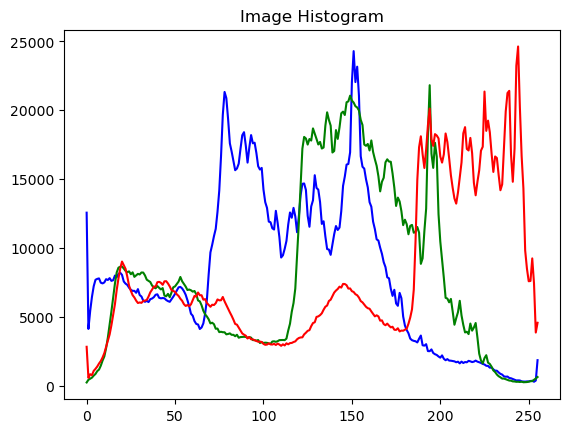

In [18]:
# define colors to plot the histograms 
colors = ('b','g','r') 
  
# compute and plot the image histograms 
for i,color in enumerate(colors): 
    hist = cv2.calcHist([imageo],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Image Histogram') 
plt.show()

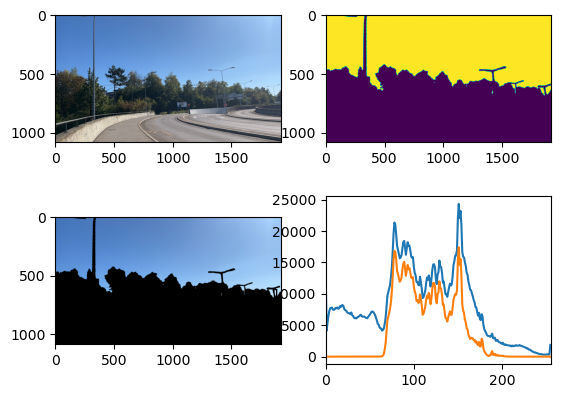

In [19]:
# # sPECTURAL FEATURES OF EACH MASK
imgo = imageo
# assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
hist_full = cv2.calcHist([imgo],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([imgo],[0],mb[0],[256],[0,256])
plt.subplot(221), plt.imshow(imgo)
plt.subplot(222), plt.imshow(mb[0])
plt.subplot(223), plt.imshow(maskedimg[0])
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

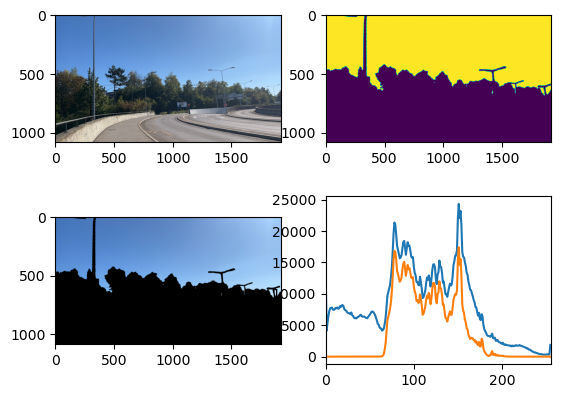

In [202]:
# i = 0
# create a mask
hist_full = cv2.calcHist([imgo],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([imgo],[0],mb[i],[256],[0,256])
plt.subplot(221), plt.imshow(imgo)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg[i])
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

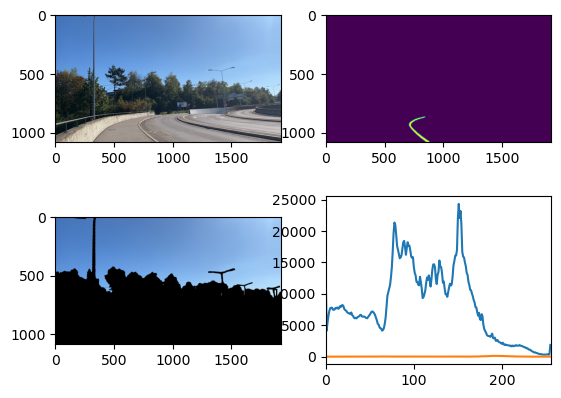

In [146]:
# # SPECTURAL FEATURES OF EACH MASK
masked_img_35 = cv2.bitwise_and(imageo,imageo,mask = mb[35])
hist_full = cv2.calcHist([imgo],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([imgo],[0],mb[35],[256],[0,256])
plt.subplot(221), plt.imshow(imgo)
plt.subplot(222), plt.imshow(mb[35])
plt.subplot(223), plt.imshow(masked_img_35)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

# Geomatric attributes

In [21]:
m0 = mb[0] * 255

Number of contours detected: 7


<function matplotlib.pyplot.show(close=None, block=None)>

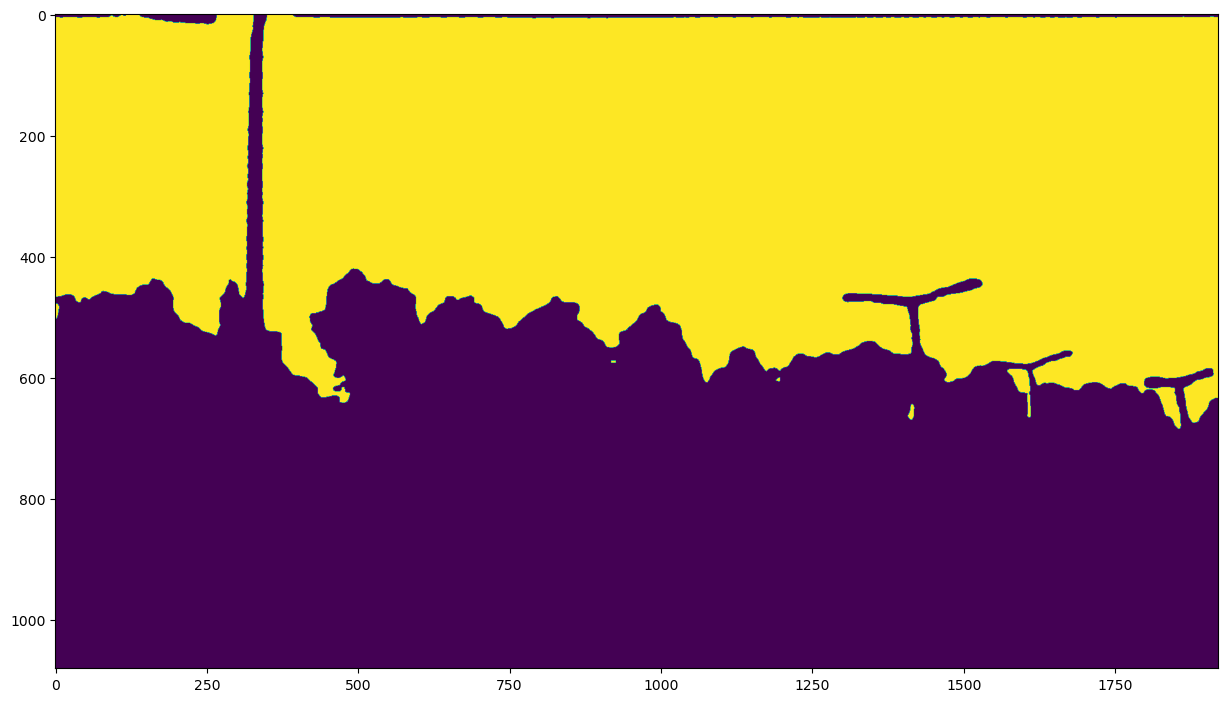

In [22]:
im = mb[0] * 255
# imgray = ima.fromarray(im)
# imgray = cv2.cvtColor(imgray, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_con1 = cv2.drawContours(maskedimg[0], contours, -1, (0,255,0), 3)
print("Number of contours detected:",len(contours))
plt.figure(figsize = (15,15))
plt.imshow(im)
plt.axis('on')
plt.show

In [23]:
# Function to find and plot filtered contours (find-filter-plot-contour)
def ffpcontour(image, mask, i):
    image_masked = cv2.bitwise_and(image,image,mask = mask[i])
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 1:
        contour_f = contours
    else:
        contour_f = []
        for i in range(0, len(contours)):
            # print(i, "len", len(contours[i]))
            if len(contours[i]) > 80:
                contour_f.append(contours[i])
    # print("filtered", "len", len(contour_f), contour_f)
    # Plotting the filtered contour
    # -1 is the contourIdx, (0,255,0) is color, 3 is the thickness
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    img_con = cv2.drawContours(image_masked, contour_f, -1, (0,255,0), 3) 
    plt.figure(figsize = (15,15))
    plt.imshow(img_con)
    plt.axis('on')
    plt.show
    return contour_f

# Function to find and plot filtered contours (find-filter-plot-contour)
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 1:
        contour_f = contours
    else:
        contour_f = []
        for i in range(0, len(contours)):
            # print(i, "len", len(contours[i]))
            if len(contours[i]) > 80:
                contour_f.append(contours[i])
        # print("filtered", "len", len(contour_f), contour_f) 
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    return contour_f

In [24]:
a = ffpcontour_noplot(imageo, mb, 0)

In [25]:
# check how many mask habe more than 1 contour
leng = []
for i in range(0,47):
    leng.append(len(ffpcontour_noplot(imageo, mb, i)))
print(leng)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


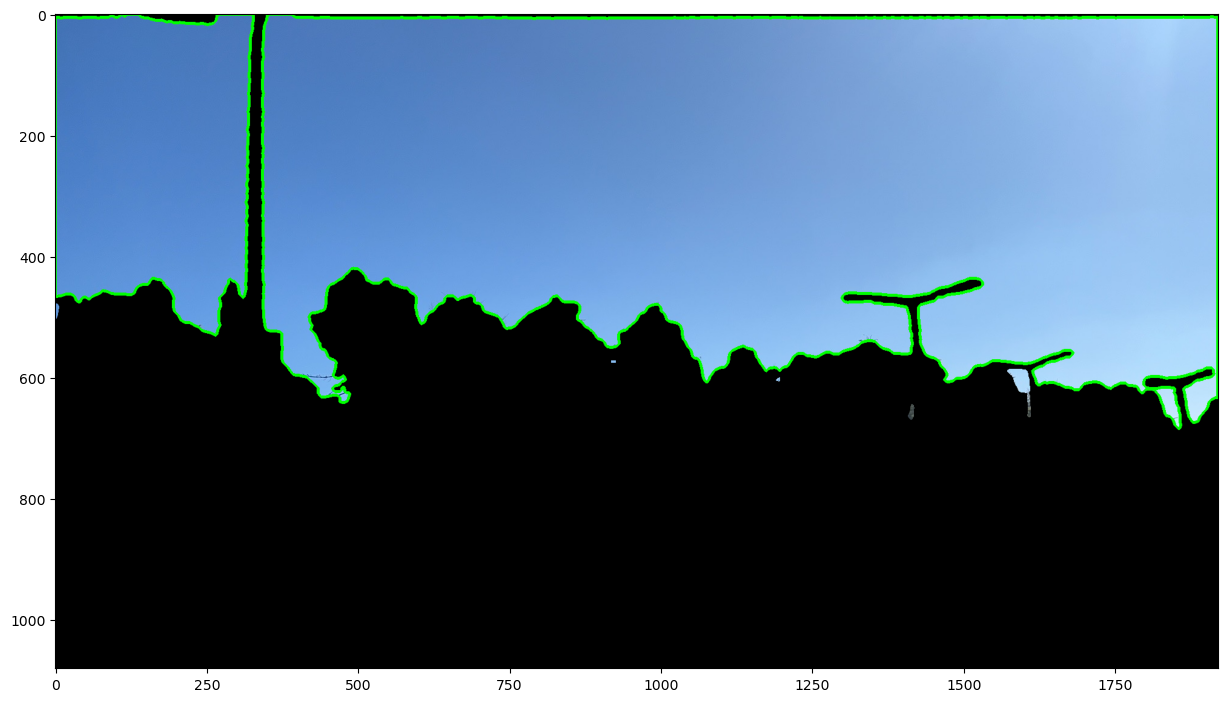

In [26]:
c0 = ffpcontour(imageo, mb, 0)

In [27]:


perimeter = cv2.arcLength(c0[1], True)
print("perimeter", perimeter)

perimeter 1839.0508579015732


In [28]:
# ffpcontour(imageo, mb, 12)

In [29]:
masked_img_1 = cv2.bitwise_and(imageo,imageo,mask = mb[1])
im = masked_img_1
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )



img_con1 = cv2.drawContours(im, contours, -1, (0,255,0), 3)
print("Number of contours detected:",len(contours))


Number of contours detected: 307


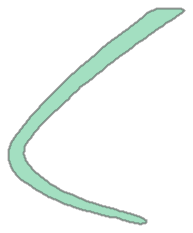

In [30]:
c35 = ffpcontour_noplot(imageo, mb, 35)
contour = np.squeeze(c35[0])
polygon = Polygon(contour)
#print(polygon.wkt)
contour = map(np.squeeze, c35)
polygons = map(Polygon, contour)
multipolygon = shapely.MultiPolygon(polygons)
multipolygon

(<matplotlib.patches.PathPatch at 0x15341ca6f550>,
 <matplotlib.lines.Line2D at 0x15340fe84350>)

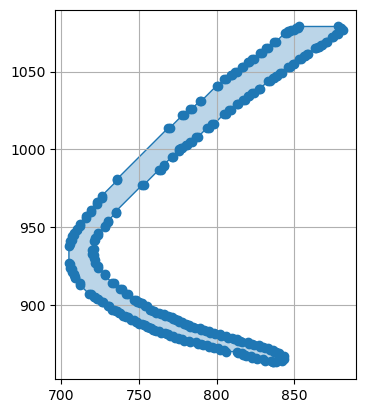

In [31]:
shapely.plotting.plot_polygon(multipolygon)

In [32]:
# a rotated rectangle of the minimum area enclosing the input 2D point set.
c35 = ffpcontour_noplot(imageo, mb, 35)
print(len(c35))
# Checking convexity
print(cv2.isContourConvex(c35[0]))
# rotated bounding rectangle
print(cv2.minAreaRect(c35[0])) 
#(Rectangel mass center; size:width and height of rectangle; angle: rotation angle in a clockwise direction)
c35_r = cv2.minAreaRect(c35[0])
ratio_wh = c35_r[1][0]/c35_r[1][1]
print("ratio", ratio_wh)

1
False
((788.6535034179688, 983.2508544921875), (220.021728515625, 148.7147674560547), 79.8379135131836)
ratio 1.4794880984542544


<class 'float'> 220.021728515625


In [65]:
# Aspect ratio
# Straight bounding rectangle
x,y,w,h = cv2.boundingRect(c35[0])
aspect_ratio = float(w)/h
ratio = w/h
print("aspect ratio",aspect_ratio, ratio)


aspect ratio 0.815668202764977 0.815668202764977


In [34]:
# Extent
area = cv2.contourArea(c35[0])
extent = float(area)/(w*h)
print("area", area)
print("extent", extent)

area 5154.0
extent 0.13418729985159727


In [35]:
# Solidity
hull = cv2.convexHull(c35[0])
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print("solidity", solidity)

solidity 0.23029490616621984


In [36]:
# Equivalent diameter
equi_diameter = np.sqrt(4*area/np.pi)
print("ed", equi_diameter)

ed 81.00787994735468


In [52]:
# Orientation & Fitting an Ellipse
# x, y coordinate of center, major semi-axis, minor semi-axis, rotation angle
(x,y),(MA,ma),angle = cv2.fitEllipse(c35[0])
print("orientation", angle)
print(MA, ma)
print(x, y)
print(ma/MA)
print(float(ma)/MA)

orientation 103.99275970458984
268.8143005371094 870.233642578125
1146.049560546875 1031.195556640625
3.2373041197560495
3.2373041197560495


In [38]:
# Moments and centroid
Moments = cv2.moments(c35[0])
print("centroids",int(Moments["m10"] / Moments["m00"]),int(Moments["m01"] / Moments["m00"]))

centroids 779 976


In [39]:
# Perimeter
perimeter = cv2.arcLength(c35[0], True)
print("perimeter", perimeter)

perimeter 807.401144862175


In [74]:
# Check if the point(masscenter) is in side the contour
point = np.array([c35_r[0][0],c35_r[0][1]])
cv2.pointPolygonTest(c35[0], point, False)

-1.0

In [75]:
point

array([788.65350342, 983.25085449])

In [67]:
# c35_r = cv2.minAreaRect(c35[0])

(x,y), (w,h), ar = cv2.minAreaRect(c35[0])
print(x, y, w, h, ar)

788.6535034179688 983.2508544921875 220.021728515625 148.7147674560547 79.8379135131836


In [76]:
a = cv2.pointPolygonTest(c35[0], point, False)
a

-1.0

In [97]:
len(c0)

2

In [82]:
p = np.array([float(x), float(y)])
a = cv2.pointPolygonTest(c35[0], point, False)
print(a,p)

-1.0 [788.65350342 983.25085449]


In [92]:
# Contour geometric attributes result
# For each contour
def cgr(contour):
    assert contour is not None, "image file could not be read, check with os.path.exists()"
    c = contour
    isconvex = cv2.isContourConvex(c) # Checking convexity
    M = cv2.moments(c) # Monments
    area = cv2.contourArea(c) # Area 
    cx = int(M['m10']/M['m00']) # Centroid
    cy = int(M['m01']/M['m00'])
    xs,ys,ws,hs = cv2.boundingRect(c) # Straight bounding rectangle
    aspect_ratio_wh_s = float(ws)/hs # Aspect ratio
    extent_s = float(area)/(ws*hs) # Extent
    hull = cv2.convexHull(c) # Solidity
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    (x,y), (w,h), ar = cv2.minAreaRect(c) # Rotated rectangle with minimum area
    aspect_ratio_wh = float(w)/h  # Aspect ratio
    extent = float(area)/(w*h) # Extent
    (xe,ye),(MA,ma),ae = cv2.fitEllipse(c35[0])
    ed = np.sqrt(4*area/np.pi) # Equivalent Diameter
    ratio_ell = float(ma)/MA
    perimeter = cv2.arcLength(c, True) # Arclength
    p_centroid = np.array([float(cx), float(cy)])
    p_masscenter = np.array([float(x), float(y)])
    is_cen_inside = cv2.pointPolygonTest(c, p_centroid, False) # Checking if centroid is inside
    is_mce_inside = cv2.pointPolygonTest(c, p_masscenter, False) # Checking if mass center is inside    
    return {
        'isconvex': isconvex,
        'area': area,
        'aspect_ratio_wh_s': aspect_ratio_wh_s,
        'extent_s': extent_s,
        'solidity': solidity,
        'aspect_ratio_wh': aspect_ratio_wh,
        'extent': extent,
        'ed': ed,
        'ratio_ell': ratio_ell,
        'perimeter': perimeter,
        'is_cen_inside': is_cen_inside,
        'is_mce_inside': is_mce_inside
    }
          

In [120]:
def csga(contours):
    assert contours is not None, "image file could not be read, check with os.path.exists()"
    if len(contours) == 1:
        ga = cgr(contours[0])
    else:
        gal = []
        for i in range(0, (len(contours)-1)):
            gal.append(cgr(contours[i]))
        isc = []
        al = []
        asps = []
        exts = []
        sol = []
        asp = []
        ext = []
        ed = []
        rate = []
        per = []
        isc = []
        ism = []
        for i in range(0, len(gal)):
            isc.append(gal[0]['isconvex'])
            al.append(gal[0]['area'])
            asps.append(gal[0]['aspect_ratio_wh_s'])
            exts.append(gal[0]['extent_s'])
            sol.append(gal[0]['solidity'])
            asp.append(gal[0]['aspect_ratio_wh'])
            ext.append(gal[0]['extent'])
            ed.append(gal[0]['ed'])
            rate.append(gal[0]['ratio_ell'])
            per.append(gal[0]['perimeter'])
            isc.append(gal[0]['is_cen_inside'])
            ism.append(gal[0]['is_mce_inside'])
        isconvex = np.all(isc)
        area = np.mean(al)
        aspect_ratio_wh_s = np.mean(asps)
        extent_s = np.mean(exts)
        solidity = np.mean(sol)
        aspect_ratio_wh = np.mean(asp)
        extent = np.mean(ext)
        ed = np.mean(ed)
        ratio_ell = np.mean(rate)
        perimeter = np.mean(per)
        is_cen_inside = np.mean(isc)
        is_mce_inside = np.mean(ism)
        ga = {
            'isconvex': isconvex,
            'area': area,
            'aspect_ratio_wh_s': aspect_ratio_wh_s,
            'extent_s': extent_s,
            'solidity': solidity,
            'aspect_ratio_wh': aspect_ratio_wh,
            'extent': extent,
            'ed': ed,
            'ratio_ell': ratio_ell,
            'perimeter': perimeter,
            'is_cen_inside': is_cen_inside,
            'is_mce_inside': is_mce_inside
        }
    return ga


In [94]:
r = cgr(c0[0])

In [95]:
r

{'isconvex': False,
 'area': 848147.5,
 'aspect_ratio_wh_s': 2.3036496350364963,
 'extent_s': 0.7846460917913278,
 'solidity': 0.8209701056234416,
 'aspect_ratio_wh': 2.3208296937196673,
 'extent': 0.7899841287822595,
 'ed': 1039.1799347409794,
 'ratio_ell': 3.2373041197560495,
 'perimeter': 6627.573049426079,
 'is_cen_inside': 1.0,
 'is_mce_inside': 1.0}

In [101]:
g = []
g.append(r)

In [103]:
g.append(r)

In [104]:
g

[{'isconvex': False,
  'area': 848147.5,
  'aspect_ratio_wh_s': 2.3036496350364963,
  'extent_s': 0.7846460917913278,
  'solidity': 0.8209701056234416,
  'aspect_ratio_wh': 2.3208296937196673,
  'extent': 0.7899841287822595,
  'ed': 1039.1799347409794,
  'ratio_ell': 3.2373041197560495,
  'perimeter': 6627.573049426079,
  'is_cen_inside': 1.0,
  'is_mce_inside': 1.0},
 {'isconvex': False,
  'area': 848147.5,
  'aspect_ratio_wh_s': 2.3036496350364963,
  'extent_s': 0.7846460917913278,
  'solidity': 0.8209701056234416,
  'aspect_ratio_wh': 2.3208296937196673,
  'extent': 0.7899841287822595,
  'ed': 1039.1799347409794,
  'ratio_ell': 3.2373041197560495,
  'perimeter': 6627.573049426079,
  'is_cen_inside': 1.0,
  'is_mce_inside': 1.0}]

In [110]:
np.all([[True,False],[True,True]])

False

In [111]:
np.all([[True,False,True,True]])

False

In [112]:
np.all([[True,True,True,True]])

True

In [113]:
np.all([[False,False,False]])

False

In [121]:
csga(c0)

{'isconvex': False,
 'area': 848147.5,
 'aspect_ratio_wh_s': 2.3036496350364963,
 'extent_s': 0.7846460917913278,
 'solidity': 0.8209701056234416,
 'aspect_ratio_wh': 2.3208296937196673,
 'extent': 0.7899841287822595,
 'ed': 1039.1799347409794,
 'ratio_ell': 3.2373041197560495,
 'perimeter': 6627.573049426079,
 'is_cen_inside': 0.5,
 'is_mce_inside': 1.0}

In [122]:
csga(c35)

{'isconvex': False,
 'area': 5154.0,
 'aspect_ratio_wh_s': 0.815668202764977,
 'extent_s': 0.13418729985159727,
 'solidity': 0.23029490616621984,
 'aspect_ratio_wh': 1.4794880984542544,
 'extent': 0.15751602573797124,
 'ed': 81.00787994735468,
 'ratio_ell': 3.2373041197560495,
 'perimeter': 807.401144862175,
 'is_cen_inside': -1.0,
 'is_mce_inside': -1.0}

In [131]:
df = df.assign(isconvex = None)
df = df.assign(area = None)
df = df.assign(aspect_ratio_wh_s = None)
df = df.assign(extent_s = None)
df = df.assign(solidity = None)
df = df.assign(aspect_ratio_wh = None)
df = df.assign(extent = None)
df = df.assign(ed = None)
df = df.assign(ratio_ell = None)
df = df.assign(perimeter = None)
df = df.assign(is_cen_inside = None)
df = df.assign(is_mce_inside = None)


In [138]:
for i in range(0, len(mb)):
    df.at[i, 'isconvex'] = csga(ffpcontour_noplot(imageo, mb, i))['isconvex']
    df.at[i, 'area'] = csga(ffpcontour_noplot(imageo, mb, i))['area']
    df.at[i, 'aspect_ratio_wh_s'] = csga(ffpcontour_noplot(imageo, mb, i))['aspect_ratio_wh_s']
    df.at[i, 'extent_s'] = csga(ffpcontour_noplot(imageo, mb, i))['extent_s']
    df.at[i, 'solidity'] = csga(ffpcontour_noplot(imageo, mb, i))['solidity']
    df.at[i, 'aspect_ratio_wh'] = csga(ffpcontour_noplot(imageo, mb, i))['aspect_ratio_wh']
    df.at[i, 'extent'] = csga(ffpcontour_noplot(imageo, mb, i))['extent']
    df.at[i, 'ed'] = csga(ffpcontour_noplot(imageo, mb, i))['ed']
    df.at[i, 'ratio_ell'] = csga(ffpcontour_noplot(imageo, mb, i))['ratio_ell']
    df.at[i, 'perimeter'] = csga(ffpcontour_noplot(imageo, mb, i))['perimeter']
    df.at[i, 'is_cen_inside'] = csga(ffpcontour_noplot(imageo, mb, i))['is_cen_inside']
    df.at[i, 'is_mce_inside'] = csga(ffpcontour_noplot(imageo, mb, i))['is_mce_inside']

In [205]:
df.to_csv('/home/yelhe/script/mt/output/result0.csv',index = False)

In [203]:
# Manual Labeling
df = df.assign(label = None)
# df = df.assign(labelgroup = None)

df = df.assign(label = ["sky", "lane", "pavement", "guardrail", "guardrail", "tree", "tree", "tree", 
                       "street_light_pole", "guardrail", "tree", "median", "tree", "tree", "tree", "tree", 
                       "tree", "guardrail", "tree", "tree", "plant", "tree", "guardrail_part", "plant", 
                       "tree", "billboard", "tree", "building", "tree", "plant", "guardrail_part", "guardrail_part", 
                       "tree", "tree", "tree", "curb", "plant", "tree", "road_sign", "tree", 
                       "billboard", "tree", "street_light_pole", "plant", "manhole_cover", "median", "tree", "road_sign"])

df = df.assign(labelgroup = ["sky", "road", "road", "infrastructure", "infrastructure", "vegetation", "vegetation", "vegetation", 
                       "infrastructure", "infrastructure", "vegetation", "infrastructure", "vegetation", "vegetation", "vegetation", "vegetation", 
                       "vegetation", "infrastructure", "vegetation", "vegetation", "vegetation", "vegetation", "infrastructure", "vegetation", 
                       "vegetation", "billboard", "vegetation", "building", "vegetation", "vegetation", "infrastructure", "infrastructure", 
                       "vegetation", "vegetation", "vegetation", "infrastructure", "vegetation", "vegetation", "infrastructure", "vegetation", 
                       "billboard", "vegetation", "infrastructure", "vegetation", "infrastructure", "infrastructure", "vegetation", "infrastructure"])

In [204]:
df

,mask,gmedian,rmedian,bmedian,bmean,gmean,rmean,bstd,gstd,rstd,...,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,label,labelgroup
0,1,159.0,220.0,113.0,115.037443,161.245059,219.314712,29.17168,27.310695,19.057815,...,0.82097,2.32083,0.789984,1039.179935,3.237304,6627.573049,0.5,1.0,sky,sky
1,2,150.0,149.0,155.0,154.293353,147.912176,146.682473,18.354942,19.075097,20.102601,...,0.769425,0.205655,0.451825,397.523513,3.237304,2627.952443,1.0,-1.0,lane,road
2,3,149.0,141.0,158.0,157.416081,147.710813,140.176188,11.144862,11.46543,11.599858,...,0.772575,0.438555,0.555195,280.620662,3.237304,1488.957492,1.0,1.0,pavement,road
3,4,196.0,178.0,206.0,189.341364,179.771029,163.463858,41.91493,41.903284,39.716842,...,0.741346,0.19431,0.492126,306.604727,3.237304,1975.810306,1.0,1.0,guardrail,infrastructure
4,5,63.0,79.0,55.0,58.687735,66.94285,80.942669,20.713621,19.271871,17.466285,...,0.983404,0.437788,0.787582,143.778709,3.237304,590.16652,1.0,1.0,guardrail,infrastructure
5,6,84.0,81.0,72.0,81.295082,93.836182,93.67527,33.403473,35.575548,37.280396,...,0.934183,0.739837,0.753239,103.608313,3.237304,381.078207,1.0,1.0,tree,vegetation
6,7,38.0,44.0,26.0,41.372655,53.490316,58.147206,36.689598,36.629197,36.59143,...,0.963835,1.45714,0.753903,184.071121,3.237304,658.357425,1.0,1.0,tree,vegetation
7,8,48.0,59.0,36.0,53.114203,70.331298,88.959082,45.544162,54.896313,67.209081,...,0.606643,1.885909,0.399864,171.576722,3.237304,1031.695519,1.0,1.0,tree,vegetation
8,9,54.0,75.0,38.0,64.578249,80.163671,100.161126,57.268386,55.777601,56.266251,...,0.70812,0.022281,0.658649,117.28903,3.237304,1759.92388,1.0,1.0,street_light_pole,infrastructure
9,10,146.0,158.0,139.0,140.124865,147.572832,159.817085,41.795546,38.38698,33.499303,...,0.952922,0.166441,0.841239,131.110667,3.237304,705.195958,1.0,1.0,guardrail,infrastructure
